In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [3]:
df.shape

(3276, 10)

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# df['Sulfate'].mean()
# df=df.drop('Sulfate', axis=1)

In [7]:
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

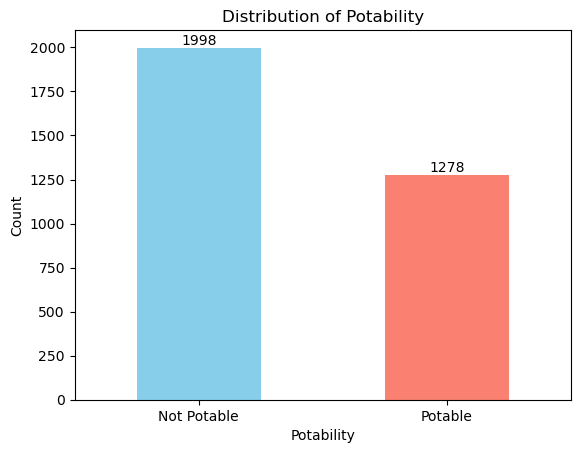

In [10]:
# Calculate value counts
potability_counts = df['Potability'].value_counts()

# Create the bar plot
bar_plot = potability_counts.plot(kind="bar", color=["skyblue", "salmon"])

# Add labels for each bar
for rect in bar_plot.patches:
    height = rect.get_height()
    bar_plot.text(rect.get_x() + rect.get_width() / 2, height + 0.5, 
                  str(height), ha='center', va='bottom')

# Customize the plot
plt.title("Distribution of Potability")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.xticks([0,1],['Not Potable','Potable'], rotation=0)

# Display the plot
plt.show()


# Partitioning

In [11]:
from imblearn.under_sampling import NearMiss
# from imblearn.over_sampling import RandomOverSampler

# Split the data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=4)

# transform the dataset
X, y = undersample.fit_resample(X, y)

# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X, y = oversample.fit_resample(X, y)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [12]:
y.value_counts()

Potability
0    1278
1    1278
Name: count, dtype: int64

# Normalization

In [13]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Model Building

# Random Forest

In [14]:
# Create and train the model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RF.predict(X_test)

# Print the accuracy of the model
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.73828125


# Feature Importance

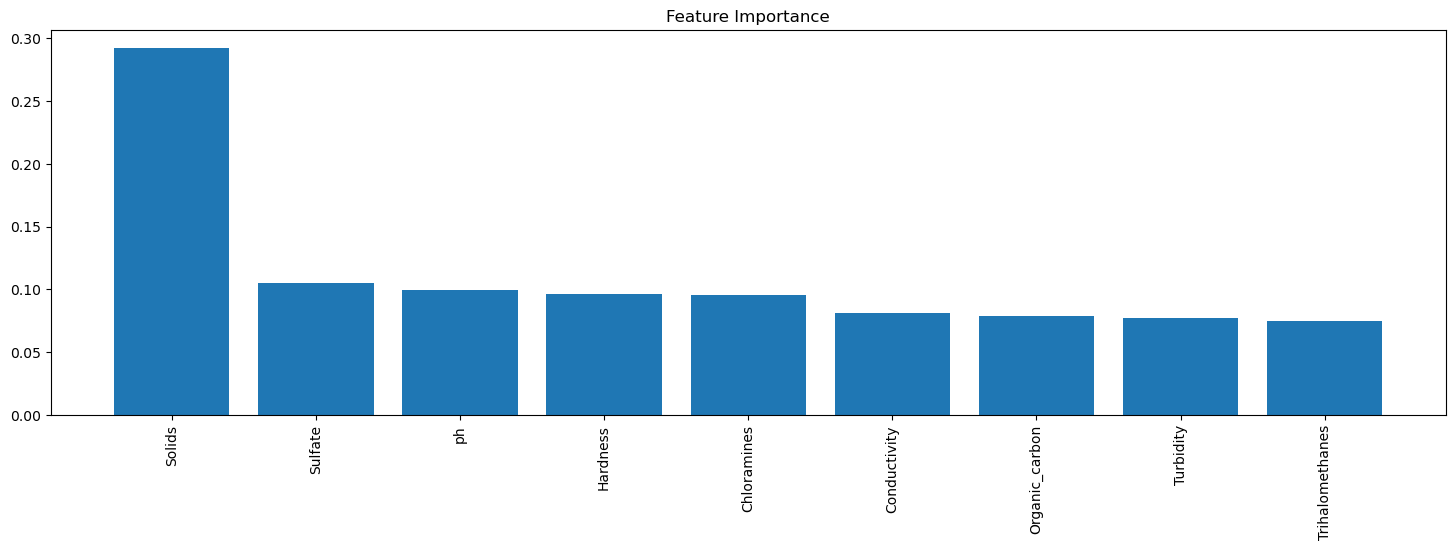

In [15]:
# Now we can extract the feature importance from the model
importances = RF.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create plot
plt.figure(figsize=(18, 5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()


# Prediction on only one set of data

In [16]:
model=RF

In [17]:
predict=model.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])

C:\Users\hotpr\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
print(predict)

[0]


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights= 'distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

In [21]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')

accuracy_score score     :  70.703125 %


In [22]:
model=knn
predict=model.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])
print(predict)

[0]


C:\Users\hotpr\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
